# Investigate a Dataset: 
   <h3>Top European Soccer Players from 2008 to 2016</h3>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#importing">Import the Data</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Introduction
<a id='intro'></a>

Soccer, also known as football in some countries, is the world's most popular sport, with millions of fans and players worldwide. The game requires a combination of technical skill, physical fitness, and tactical awareness, with players using their feet to control and move the ball around the pitch. However, not all players use their feet in the same way, and some players have a preferred kicking foot that they use more frequently than the other.

This data analysis project aims to analyze a dataset of top soccer players to identify their preferred kicking foot and explore potential correlations between preferred foot and performance. The dataset includes information such as player names, height, weight, overall rating, preferred foot, and birthday. 

The project will utilize a variety of analytical techniques, including data cleaning, exploratory data analysis, and visualization. The findings from this project can provide valuable insights for coaches, scouts, and fans looking to understand the importance of preferred kicking foot and how it may impact player performance.

The dataset for the following analysis is provided on [kaggle](https://www.kaggle.com/datasets/hugomathien/soccer). The soccer database is viewable via DB Browser for SQLite. Tables that are joined for the analysis from the soccer database include Player and Player_Attributes.  

### Question(s) for Analysis

<b>Question 1</b>. <i>What is the distribution of preferred kicking foot among the top soccer players in the world, and is there a significant difference in performance between players who prefer their left foot versus their right foot?</i>

<b>Question 2</b>. <i>What is the distribution of preferred kicking foot among the top 100 soccer players in the world, and is there a significant difference in the distribution of kicking foot preference between players in different positions (e.g. defenders, midfielders, forwards)?</i>

In [101]:
#http://ipython.readthedocs.io/en/stable/interactive/magics.html
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt


### Importing the Data
<a id='import'></a>

In any data analysis project, importing the data is a critical first step. The data import process involves retrieving the data from its source and loading it into a format that can be analyzed. This process is essential to ensure that the data is clean, accurate, and complete. Depending on the type and size of the data, different tools and techniques may be required to import the data efficiently and effectively.

It's important to carefully consider the data import process, as any errors or omissions at this stage can have significant impacts on the accuracy and validity of subsequent analyses. As such, it's crucial to thoroughly test and validate the imported data, as well as document the source of the data and any preprocessing steps taken.

Overall, the data import process is a critical step in any data analysis project, and it's important to devote the necessary time and attention to ensure that the imported data is accurate, reliable, and suitable for analysis.

In [102]:
df = pd.read_csv("top_players.csv")
df.head()

,player_name,height,weight,Overall Rating,preferred_foot,birthday
0,Lionel Messi,170.18,159,92.0,left,1987-06-24 00:00:00
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05 00:00:00
2,Neymar,175.26,150,84.0,right,1992-02-05 00:00:00
3,Manuel Neuer,193.04,203,86.0,right,1986-03-27 00:00:00
4,Luis Suarez,182.88,187,85.0,right,1987-01-24 00:00:00


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.


# Data Cleaning

Data cleaning is a critical step in any data analysis project, as it ensures that the data is accurate, complete, and consistent. In this project, we will perform several data cleaning tasks to prepare the dataset for analysis. These tasks include:

Removing duplicate records: We will check for and remove any duplicate records in the dataset to ensure that each observation is unique.

Handling missing values: We will identify any missing values in the dataset and determine the appropriate method for handling them, such as imputing with mean or median values, or removing the observation entirely if the missing values are too numerous.

Standardizing data formats: We will ensure that all data is in a consistent format, such as converting all dates to a standard date format or ensuring that all text data is in the same case.

Checking for outliers: We will identify any outliers in the dataset that may be the result of errors or anomalies and determine the appropriate method for handling them, such as removing them or adjusting them to more reasonable values.

Removing irrelevant or redundant data: We will remove any data that is not relevant to the research question or redundant, such as duplicated information in multiple columns.

By performing these data cleaning tasks, we can ensure that our analysis is based on accurate, high-quality data, and that any insights we uncover are reliable and actionable.

After printing out the first 25 rows of the data, it can be seen that the Overall_Rating column isn't quite ordered correctly. This will require some cleaning to order and sort the data by this particular column. Additionally, the birthday column has a timestamp which is not populated with relevant data. We will end up keeping the date and deleting the timestamp for entries in the birthday column. 

But first, let's check for duplicate data and missing values. 
 

In [103]:
df.isnull().any()

player_name       False
height            False
weight            False
Overall Rating    False
preferred_foot    False
birthday          False
dtype: bool

In [104]:
df.drop_duplicates()

,player_name,height,weight,Overall Rating,preferred_foot,birthday
0,Lionel Messi,170.18,159,92.0,left,1987-06-24 00:00:00
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05 00:00:00
2,Neymar,175.26,150,84.0,right,1992-02-05 00:00:00
3,Manuel Neuer,193.04,203,86.0,right,1986-03-27 00:00:00
4,Luis Suarez,182.88,187,85.0,right,1987-01-24 00:00:00
...,...,...,...,...,...,...
10843,Gianluca D'Angelo,175.26,139,44.0,left,1991-03-13 00:00:00
10844,Liam Hughes,177.80,150,46.0,right,1988-09-11 00:00:00
10845,Emir Sinanovic,180.34,154,48.0,left,1988-10-24 00:00:00
10846,Benjamin Fischer,175.26,157,46.0,right,1980-10-19 00:00:00


In [105]:
#df.rename(columns={"A": "a", "B": "c"})
df2 = df.rename(columns={"Overall Rating": "overall_rating"})

In [106]:
df2

,player_name,height,weight,overall_rating,preferred_foot,birthday
0,Lionel Messi,170.18,159,92.0,left,1987-06-24 00:00:00
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05 00:00:00
2,Neymar,175.26,150,84.0,right,1992-02-05 00:00:00
3,Manuel Neuer,193.04,203,86.0,right,1986-03-27 00:00:00
4,Luis Suarez,182.88,187,85.0,right,1987-01-24 00:00:00
...,...,...,...,...,...,...
10843,Gianluca D'Angelo,175.26,139,44.0,left,1991-03-13 00:00:00
10844,Liam Hughes,177.80,150,46.0,right,1988-09-11 00:00:00
10845,Emir Sinanovic,180.34,154,48.0,left,1988-10-24 00:00:00
10846,Benjamin Fischer,175.26,157,46.0,right,1980-10-19 00:00:00


In [108]:
df2 = df2.sort_values(by=["overall_rating"], ascending=False)
df2.head(25)

,player_name,height,weight,overall_rating,preferred_foot,birthday
0,Lionel Messi,170.18,159,92.0,left,1987-06-24 00:00:00
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05 00:00:00
21,Xavi Hernandez,170.18,148,88.0,right,1980-01-25 00:00:00
5,Zlatan Ibrahimovic,195.58,209,88.0,right,1981-10-03 00:00:00
6,Arjen Robben,180.34,176,88.0,left,1984-01-23 00:00:00
12,Andres Iniesta,170.18,150,88.0,right,1984-05-11 00:00:00
33,Franck Ribery,170.18,159,88.0,right,1983-04-07 00:00:00
160,Iker Casillas,185.42,185,87.0,left,1981-05-20 00:00:00
40,Wayne Rooney,175.26,183,87.0,right,1985-10-24 00:00:00
35,David Silva,170.18,148,87.0,left,1986-01-08 00:00:00


In [109]:
df2['Birthday_New'] = pd.to_datetime(df2['birthday']).dt.date

In [ ]:
cleaned_df = df2.drop('birthday', axis=1)

In [ ]:
cleaned_df.reset_index(inplace=True)

In [ ]:
cleaned_df.drop(['index'], axis=1, inplace=True)

In [ ]:
cleaned_df

,player_name,height,weight,Overall Rating,preferred_foot,Birthday_New
0,Lionel Messi,170.18,159,92.0,left,1987-06-24
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05
2,Xavi Hernandez,170.18,148,88.0,right,1980-01-25
3,Zlatan Ibrahimovic,195.58,209,88.0,right,1981-10-03
4,Arjen Robben,180.34,176,88.0,left,1984-01-23
...,...,...,...,...,...,...
10843,Benjamin Fischer,175.26,157,46.0,right,1980-10-19
10844,Boubacar Mansaly,175.26,150,45.0,right,1988-02-04
10845,Badis Lebbihi,180.34,176,45.0,left,1990-03-14
10846,Gianluca D'Angelo,175.26,139,44.0,left,1991-03-13


### Text - Exploratory Data Analysis 
<a id='eda'></a>

The aim of this data analysis project is to conduct exploratory data analysis on a given dataset, in order to gain insights and understanding of the variables and relationships within the data. The project will involve the use of various statistical and visualization techniques to identify patterns, trends, and outliers, as well as to test hypotheses and make predictions based on the data. The findings from this project will provide valuable information for future research and decision-making processes.




In [ ]:
preferred_foot_array = np.array(cleaned_df['preferred_foot'])

In [ ]:
lfoot = 0
rfoot = 0 

for i in preferred_foot_array:
    if i == 'left':
        lfoot += 1
    else:
        rfoot += 1

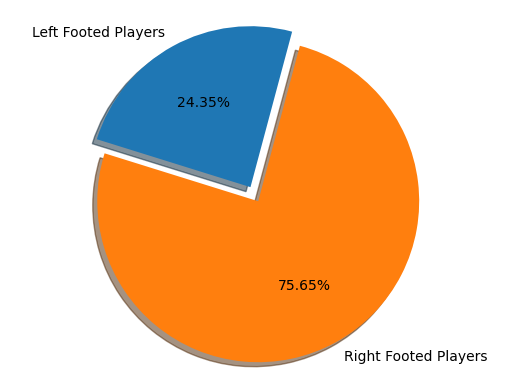

In [ ]:
lbl = ['Left Footed Players', 'Right Footed Players']
vals = [lfoot, rfoot]
explode = [0, 0.1]

fig1, ax1 = plt.subplots()
ax1.pie(vals, explode=explode, labels=lbl, autopct='%1.2f%%', shadow=True, startangle=75)
ax1.axis('equal')
plt.show()

In [ ]:
df_new = cleaned_df.groupby('preferred_foot').sum('overall_rating')

In [ ]:
df_new['foot_count'] = lfoot,rfoot

In [ ]:
df_new.drop(['height', 'weight'], axis=1, inplace=True)

In [ ]:
df_new['avg_rating'] = (df_new['Overall Rating'] / df_new['foot_count']).round(2)

### Research Question 2  (Replace this header name!)

In [ ]:
df_new

,Overall Rating,foot_count,avg_rating
preferred_foot,,,
left,176364.0,2642,66.75
right,548496.0,8206,66.84


In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

### Limitation
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255